In [ ]:
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [37]:
ds = xr.open_dataset("../data.grib")
t2m_numpy = ds.t2m.to_numpy()
data = t2m_numpy
samples, latitude, longtitude = data.shape
data.shape

(1080, 25, 45)

In [52]:
# horizon from which we will be forecasting (ts-1, ...) -> (1, ...)
horizon = 2
while 1:
    if samples % horizon == 0:
        break
    horizon+=1

In [53]:
data = data.reshape(-1, horizon, latitude*longtitude)
y = data[:,-1,:]
X = data[:,:horizon-1,:]
samples = X.shape[0]
X = X.reshape(samples, latitude*longtitude, horizon-1)
y.shape, X.shape

((540, 1125), (540, 1125, 1))

In [54]:
train_percentage = 0.8
train_samples = int(train_percentage * samples)

X_train, X_test = X[:train_samples], X[train_samples:]
y_train, y_test = y[:train_samples], y[train_samples:]

model = LinearRegression()
for i in range(train_samples):
    model.fit(X_train[i], y_train[i])

In [55]:
X_train.shape, y_train.shape

((432, 1125, 1), (432, 1125))

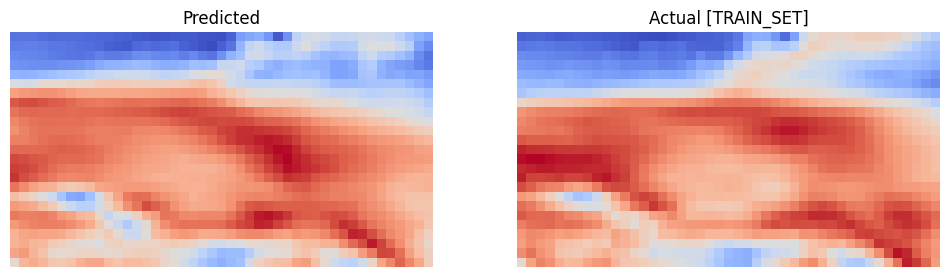

Mean Squared Error: 8.917267799377441
R-squared (R2) Score: -2.353239565484663


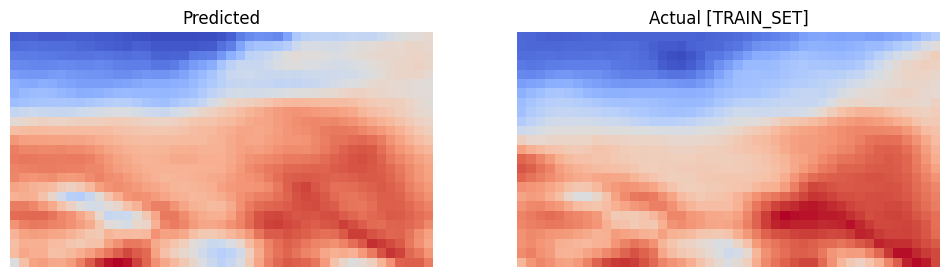

Mean Squared Error: 5.376073837280273
R-squared (R2) Score: 0.44693878586173585


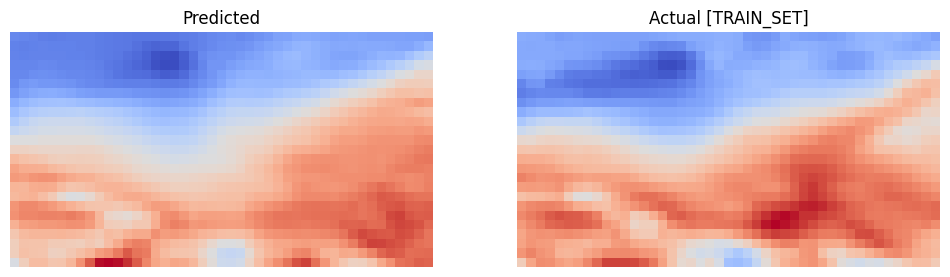

Mean Squared Error: 17.466554641723633
R-squared (R2) Score: -2.853339842408681


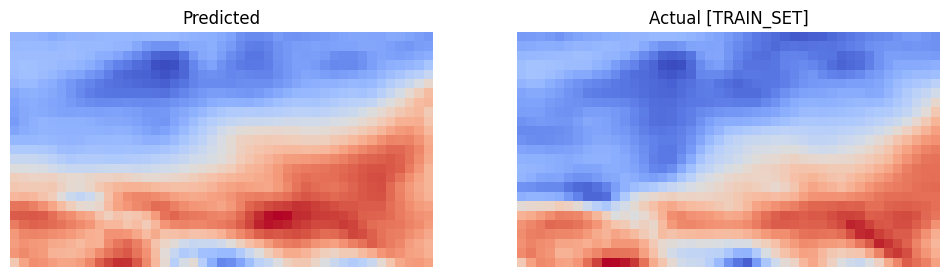

Mean Squared Error: 19.681760787963867
R-squared (R2) Score: -4.121746618390837


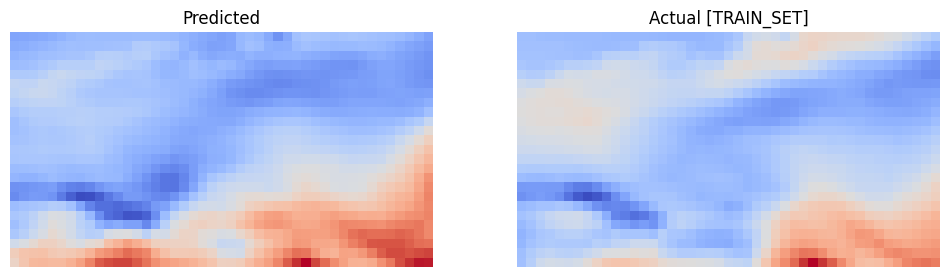

Mean Squared Error: 12.30575942993164
R-squared (R2) Score: -2.5232294587085558


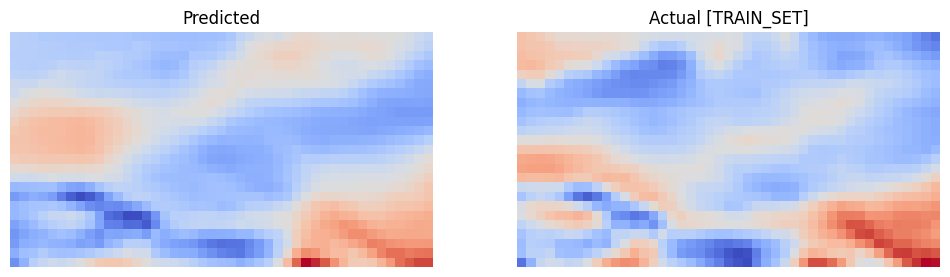

Mean Squared Error: 32.852638244628906
R-squared (R2) Score: -26.225635499698637


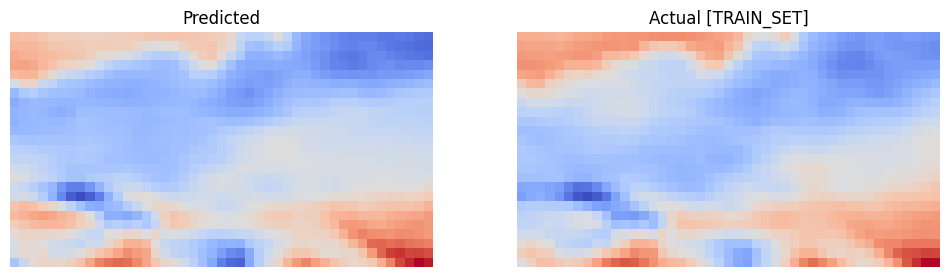

Mean Squared Error: 50.306922912597656
R-squared (R2) Score: -21.7753039087159


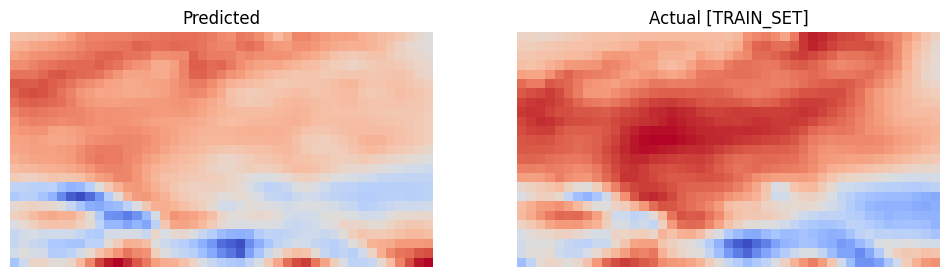

Mean Squared Error: 15.667451858520508
R-squared (R2) Score: -5.965400900660641


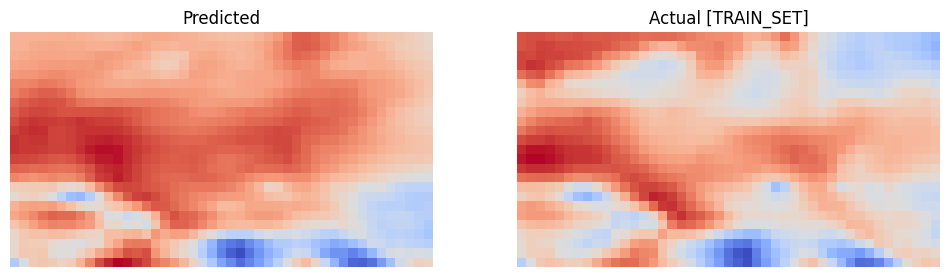

Mean Squared Error: 46.64375305175781
R-squared (R2) Score: -30.633357117646


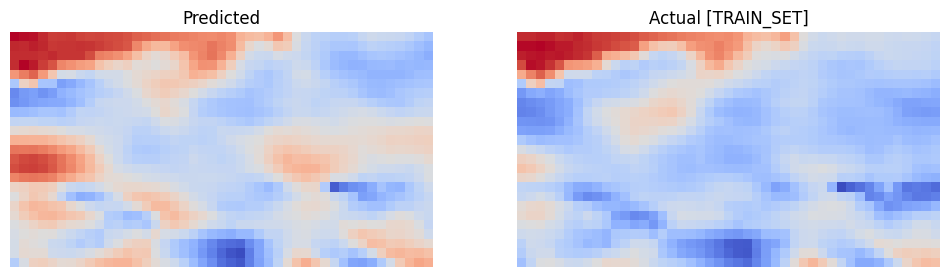

Mean Squared Error: 59.32902145385742
R-squared (R2) Score: -32.304297651294405


In [56]:
for j in range(10):
    y_hat = model.predict(X_train[j])
    mse = mean_squared_error(y_train[j], y_hat)
    r2 = r2_score(y_train[j], y_hat)
    y_hat = y_hat.reshape(latitude, longtitude)
    y_train_sample = y_train[j].reshape(latitude, longtitude)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].imshow(y_hat, cmap=plt.cm.coolwarm)
    ax[0].set_title('Predicted')
    ax[0].axis('off')
    ax[1].imshow(y_train_sample, cmap=plt.cm.coolwarm)
    ax[1].set_title('Actual [TRAIN_SET]')
    ax[1].axis('off')
    plt.show()
    
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared (R2) Score: {r2}")

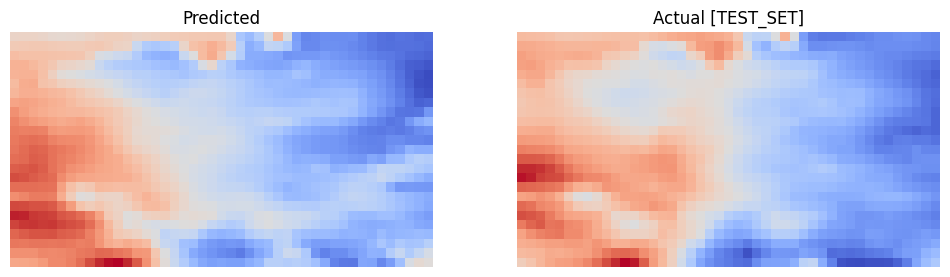

Mean Squared Error: 5.8855462074279785
R-squared (R2) Score: 0.007718621672445969


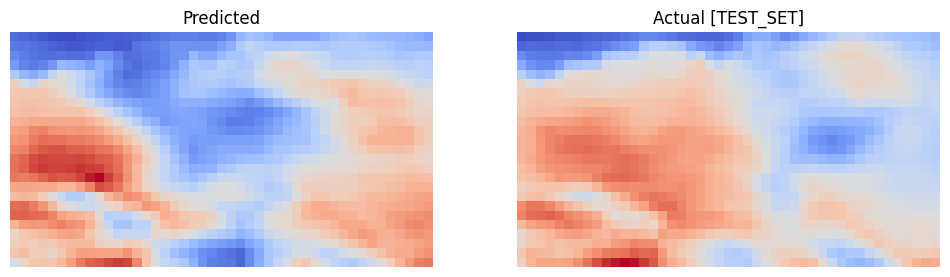

Mean Squared Error: 95.84290313720703
R-squared (R2) Score: -14.626133893952224


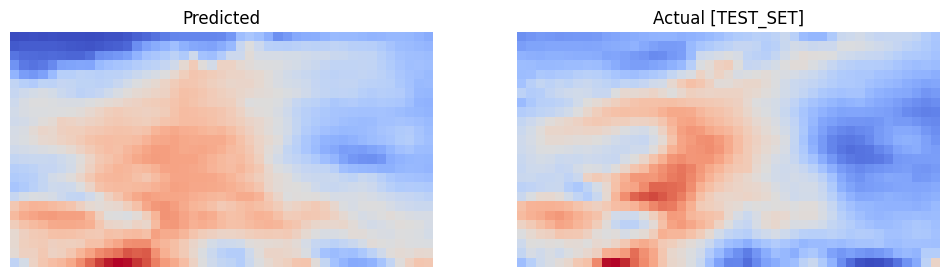

Mean Squared Error: 8.197385787963867
R-squared (R2) Score: -1.7609174911198777


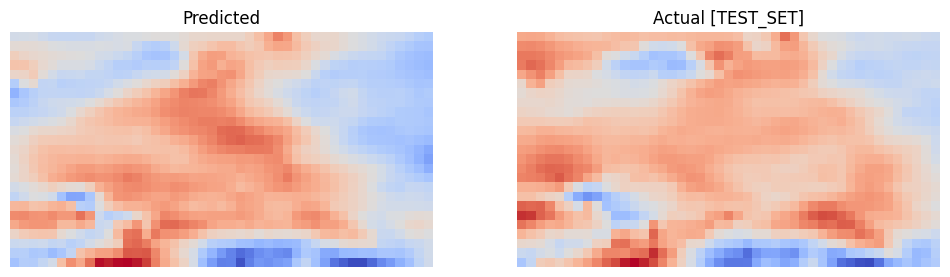

Mean Squared Error: 8.977116584777832
R-squared (R2) Score: -8.785889810796846


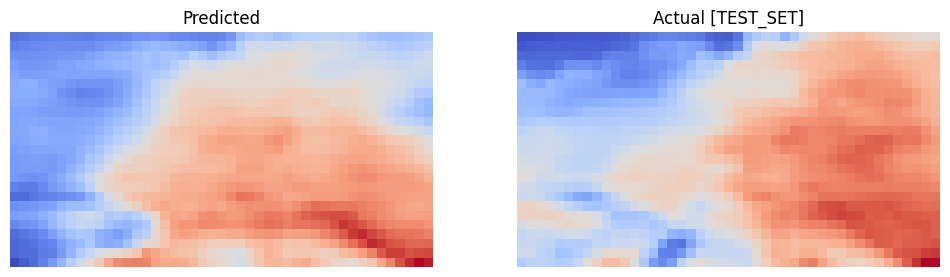

Mean Squared Error: 88.98619079589844
R-squared (R2) Score: -7.59918025357026


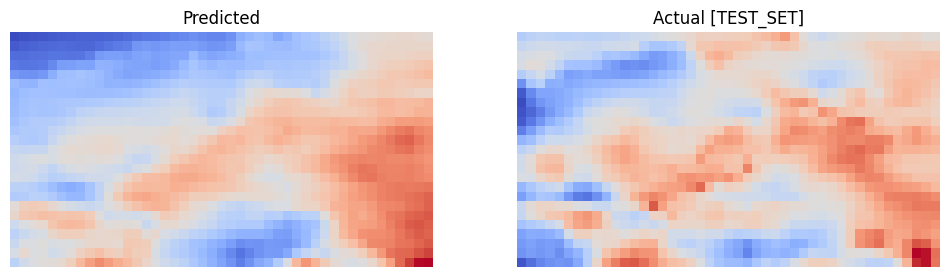

Mean Squared Error: 3.5572397708892822
R-squared (R2) Score: -1.3485193333619003


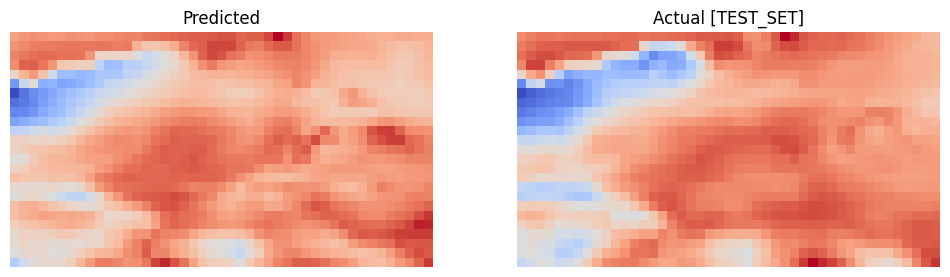

Mean Squared Error: 7.055905342102051
R-squared (R2) Score: -2.1311939208135438


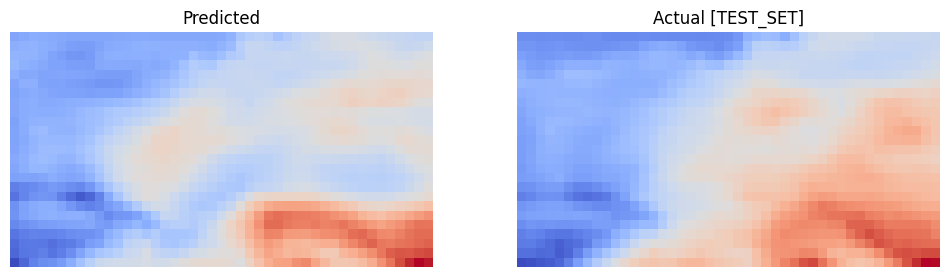

Mean Squared Error: 66.32483673095703
R-squared (R2) Score: -3.848430020318535


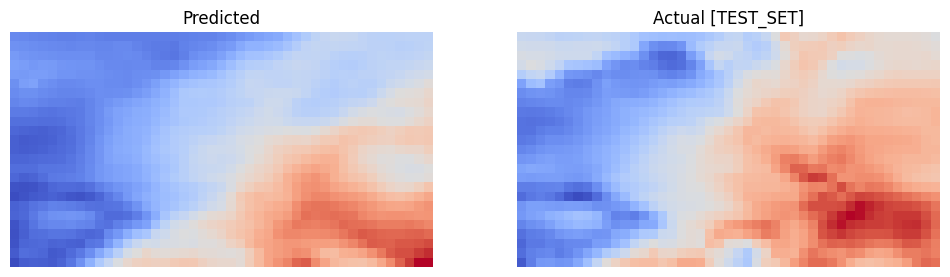

Mean Squared Error: 5.909354209899902
R-squared (R2) Score: 0.0029263483487892428


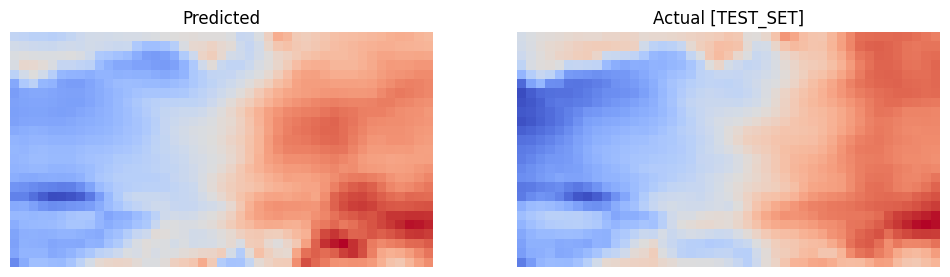

Mean Squared Error: 6.651883602142334
R-squared (R2) Score: -0.23712435491079642


In [58]:
for j in range(10):
    y_hat = model.predict(X_test[j])
    mse = mean_squared_error(y_test[j], y_hat)
    r2 = r2_score(y_test[j], y_hat)
    y_hat = y_hat.reshape(latitude, longtitude)
    y_test_sample = y_test[j].reshape(latitude, longtitude)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].imshow(y_hat, cmap=plt.cm.coolwarm)
    ax[0].set_title('Predicted')
    ax[0].axis('off')
    ax[1].imshow(y_test_sample, cmap=plt.cm.coolwarm)
    ax[1].set_title('Actual [TEST_SET]')
    ax[1].axis('off')
    plt.show()
    
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared (R2) Score: {r2}")

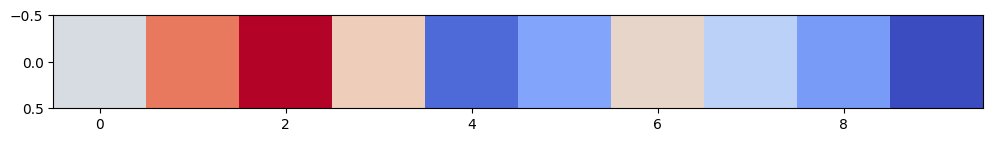

In [59]:
plt.figure(figsize=(12,10))
yy = y[0].reshape(1,-1)
plt.imshow(yy[:,:10], cmap=plt.cm.coolwarm)
plt.show()